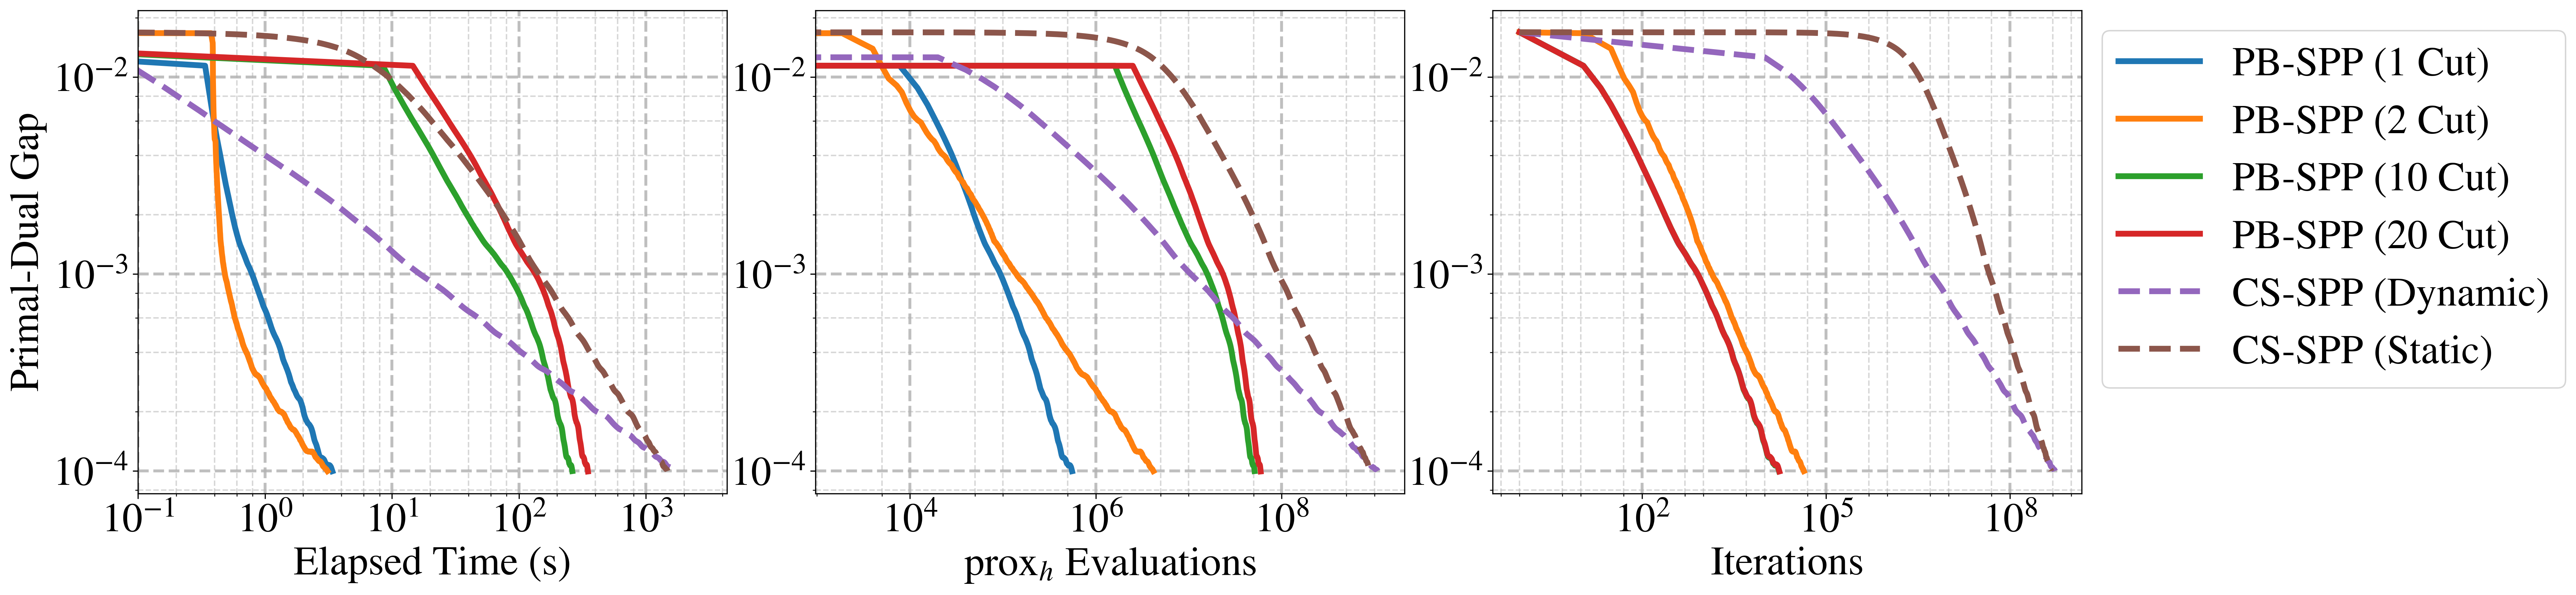

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import os
import matplotlib.ticker as tck
import sys
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
import plot_settings
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 28

flist = [
    ("data/subg_dynamic_n_100_m_100_eps_1en4_5en2_2.csv", "CS-SPP (Dynamic)", -1),
    ("data/subg_static_n_100_m_100_eps_1en4_5en2_2.csv", "CS-SPP (Static)", -1),
    ("data/1cut_n_100_m_100_eps_1en4_5en2_2.csv", "PB-SPP (1 Cut)", 1),
    ("data/2cut_n_100_m_100_eps_1en4_5en2_2.csv", "PB-SPP (2 Cut)", 2),
    ("data/10cut_n_100_m_100_eps_1en4_5en2_2.csv", "PB-SPP (10 Cut)", 10),
    ("data/20cut_n_100_m_100_eps_1en4_5en2_2.csv", "PB-SPP (20 Cut)", 20)
]
dflist = []
for file, method, ncuts in flist:
    df = pd.read_csv(file)
    df['method'] = method
    df['cuts'] = ncuts
    dflist.append(df)


df = pd.concat(dflist).reset_index()
fig, axes = plt.subplot_mosaic([['time', 'inner_steps', 'outer_steps']], figsize=(24,6), gridspec_kw={'wspace':0.15})
palette = sns.color_palette('tab10')
ncolors = 0

for i,((cuts, method), subdf) in enumerate(df.loc[df['method'].str.contains('PB-SPP')].groupby(['cuts', 'method'])):
    plot_kwargs = dict(
        linestyle='-',
        linewidth=4,
        color=palette[i],
        label=method,
    )
    axes['time'].plot(subdf['elapsed_time(s)'], subdf['pd_gap'], 
                      **plot_kwargs)
    axes['outer_steps'].plot(subdf['outer_steps'], subdf['pd_gap'], 
                      **plot_kwargs)
    axes['inner_steps'].plot(subdf['inner_steps'], subdf['pd_gap'], 
                      **plot_kwargs)
    ncolors += 1
for i,(method, subdf) in enumerate(df.loc[df['method'].str.contains('CS-SPP')].groupby('method')):
    plot_kwargs = dict(
        linestyle='--',
        linewidth=4,
        color=palette[ncolors+i],
        label=method,
    )
    axes['time'].plot(subdf['elapsed_time(s)'], subdf['pd_gap'], 
                      **plot_kwargs)
    axes['outer_steps'].plot(subdf['outer_steps'], subdf['pd_gap'], 
                      **plot_kwargs)
    axes['inner_steps'].plot(subdf['inner_steps'], subdf['pd_gap'], 
                      **plot_kwargs)
# sns.lineplot(df, x='elapsed_time(s)', y='pd_gap', hue="method", ax=axes['time'], linewidth=3)
# sns.lineplot(df, x='outer_steps', y='pd_gap', hue="method", ax=axes['outer_steps'], linewidth=3)
# sns.lineplot(df, x='inner_steps', y='pd_gap', hue="method", ax=axes['inner_steps'], linewidth=3)
# ax.set_xscale('log')
axes['time'].set_yscale('log')
axes['outer_steps'].set_yscale('log')
axes['outer_steps'].set_xscale('log')
axes['inner_steps'].set_yscale('log')
axes['inner_steps'].set_xscale('log')
axes['time'].set_xlabel('Elapsed Time (s)')
axes['outer_steps'].set_xlabel('Iterations')
axes['inner_steps'].set_xlabel('$\\text{prox}_h$ Evaluations')
axes['time'].set_ylabel('Primal-Dual Gap')
axes['outer_steps'].set_ylabel('')
axes['inner_steps'].set_ylabel('')
axes['outer_steps'].legend(bbox_to_anchor=(1,1), loc='upper left')
axes['time'].set_xscale('log')
axes['time'].legend_ = None
axes['inner_steps'].legend_ = None

xmajor_locator = tck.LogLocator(base=10)
minor_locator = tck.LogLocator(base=10, subs=[2, 4, 6, 8], numticks=20)
minor_locator_time = tck.LogLocator(base=10, subs=[2, 4, 6, 8])
major_formatter = tck.LogFormatterMathtext(base=10)
major_locator = tck.LogLocator(base=10, subs=[1])
axes['time'].xaxis.set_major_locator(xmajor_locator)
axes['time'].xaxis.set_minor_locator( tck.LogLocator(base=10, subs=[1, 2, 4, 6, 8]))
loc1 = tck.LogLocator(base=10, subs=[1, 5], numticks=20)
loc2=tck.LogLocator(base=10, subs=[1, 5], numticks=20)
axes['inner_steps'].xaxis.set_major_locator(tck.LogLocator(base=10, subs=[1]))
axes['outer_steps'].xaxis.set_major_locator(tck.LogLocator(base=10, subs=[1]))
axes['inner_steps'].xaxis.set_minor_locator(loc1)
axes['outer_steps'].xaxis.set_minor_locator(loc2)
axes['outer_steps'].xaxis.set_minor_formatter(tck.NullFormatter())
axes['inner_steps'].xaxis.set_minor_formatter(tck.NullFormatter())
axes['time'].set_xlim((1e-1, axes['time'].get_xlim()[1]))
for k in axes:

    axes[k].yaxis.set_major_locator(major_locator)
    axes[k].yaxis.set_minor_locator(minor_locator)
    axes[k].yaxis.set_major_formatter(major_formatter)
    # axes[k].yaxis.set_minor_locator(minor_locator)
    axes[k].grid(which='major',linewidth=2, alpha=0.8, linestyle='--')
    axes[k].grid(which='minor',linewidth=1, alpha=0.5, linestyle='--')
fig.savefig('figures/proxbundle_spp.pdf', bbox_inches='tight')

In [25]:
palette

[(0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

<Axes: >

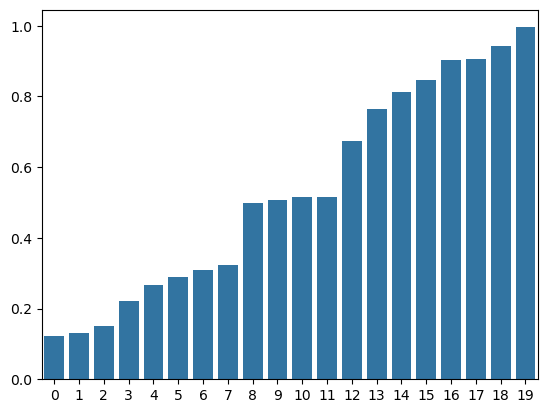

In [43]:
sns.barplot(z)

In [44]:
np.sum(z[:3]) / 3 - z[1]

np.float64(0.004178641669012245)